<a href="https://colab.research.google.com/github/srijitabhowmik/ML/blob/main/shoping_Trends_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving shopping_trends.csv to shopping_trends.csv


In [ ]:
shopping = pd.read_csv("shopping_trends.csv")
shopping.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
shopping.shape

(3900, 19)

In [ ]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
print(shopping.isnull().sum())

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [ ]:
print(shopping.dtypes)


Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object


 Convert Categorical Data into Numeric Values
Use label encoding or one-hot encoding for categorical variables before calculating correlation.

Label Encoding (if categorical values are ordered):

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
shopping['Gender'] = label_encoder.fit_transform(shopping['Gender'])  # 'Male' → 1, 'Female' → 0


# Converts categorical to numeric

In [ ]:
dataset = pd.get_dummies(shopping, drop_first=True)
print(shopping.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')


In [ ]:
shopping.columns = shopping.columns.str.strip()
shopping.columns = shopping.columns.str.replace(' ', '_')
shopping.columns = shopping.columns.str.lower()
print(shopping.columns)


Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'payment_method',
       'shipping_type', 'discount_applied', 'promo_code_used',
       'previous_purchases', 'preferred_payment_method',
       'frequency_of_purchases'],
      dtype='object')


In [ ]:
print(shopping.head())
print(shopping.info())


   customer_id  age  gender item_purchased  category  purchase_amount_(usd)  \
0            1   55       1         Blouse  Clothing                     53   
1            2   19       1        Sweater  Clothing                     64   
2            3   50       1          Jeans  Clothing                     73   
3            4   21       1        Sandals  Footwear                     90   
4            5   45       1         Blouse  Clothing                     49   

        location size      color  season  review_rating subscription_status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  payment_method  shipping_type discount_applied p

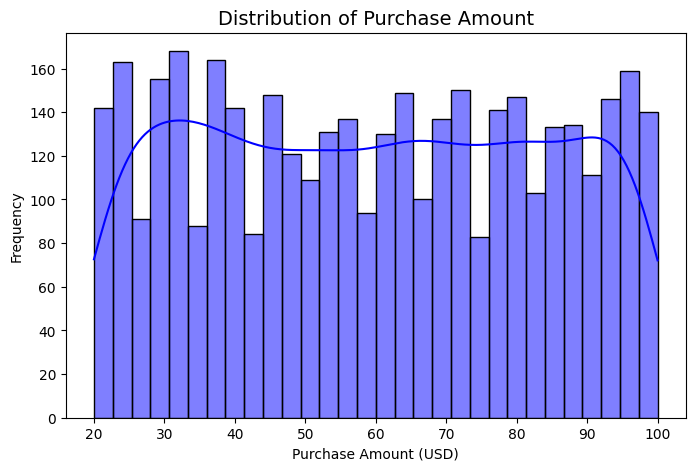

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(shopping['purchase_amount_(usd)'], bins=30, kde=True, color='blue')
plt.title("Distribution of Purchase Amount", fontsize=14)
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Frequency")
plt.show()


<ipython-input-13-5b9d5a7f0497>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=shopping['category'], order=shopping['category'].value_counts().index, palette="coolwarm")


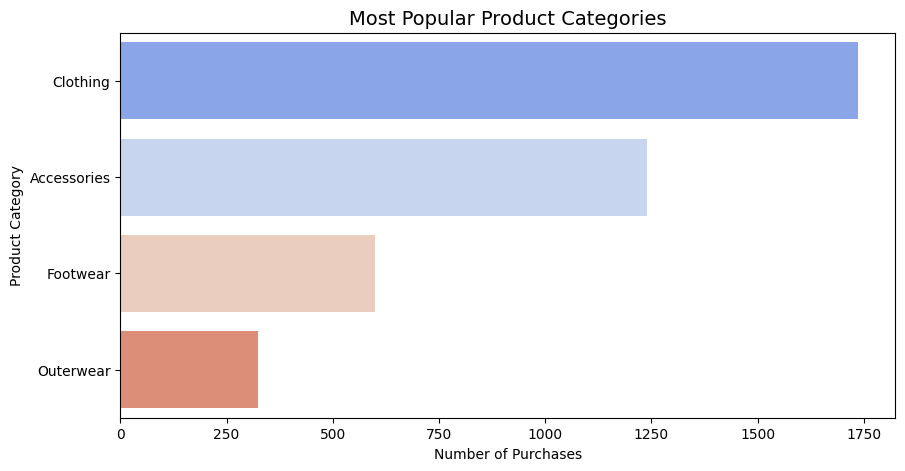

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y=shopping['category'], order=shopping['category'].value_counts().index, palette="coolwarm")
plt.title("Most Popular Product Categories", fontsize=14)
plt.xlabel("Number of Purchases")
plt.ylabel("Product Category")
plt.show()


In [ ]:
shopping.columns = shopping.columns.str.strip()
print(shopping.columns)  # Check again


Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'payment_method',
       'shipping_type', 'discount_applied', 'promo_code_used',
       'previous_purchases', 'preferred_payment_method',
       'frequency_of_purchases'],
      dtype='object')


<ipython-input-15-248945b282da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=shopping['age'], palette="Set2")


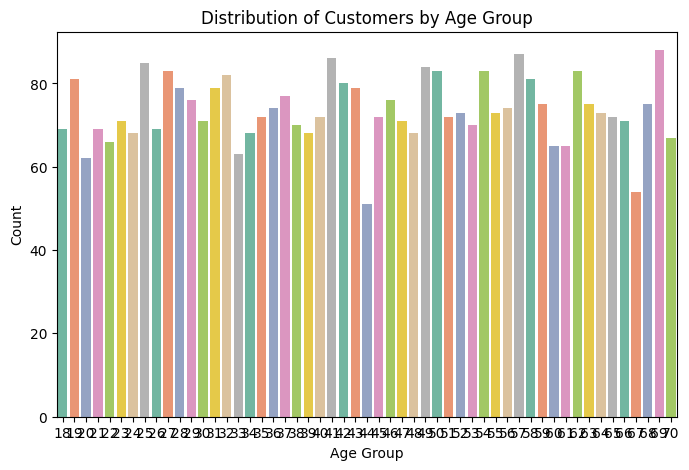

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=shopping['age'], palette="Set2")
plt.title("Distribution of Customers by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


<ipython-input-16-2a4bcb2c2ae4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=shopping['payment_method'], palette="pastel")


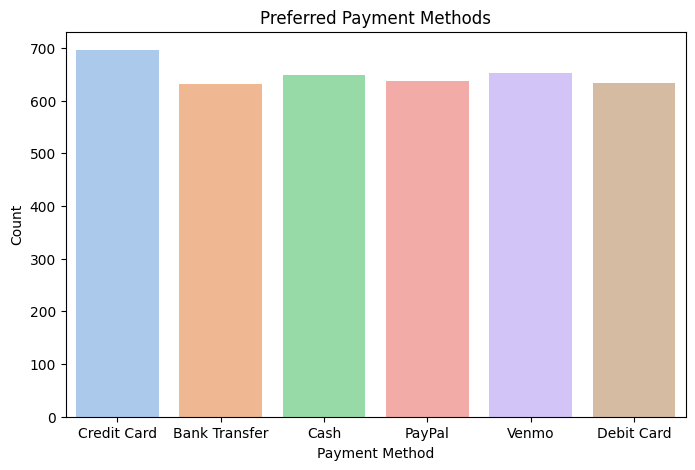

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=shopping['payment_method'], palette="pastel")
plt.title("Preferred Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()


step 4

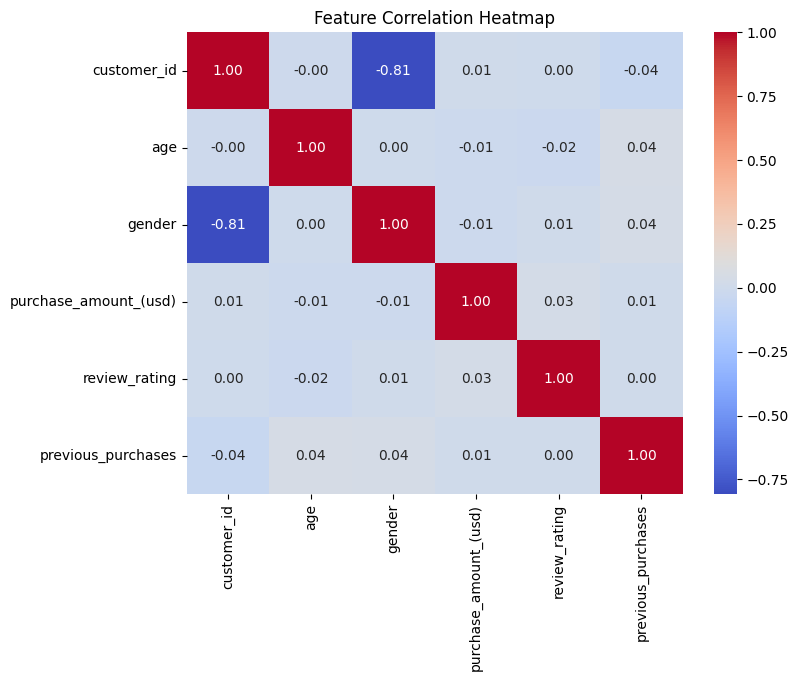

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(shopping.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


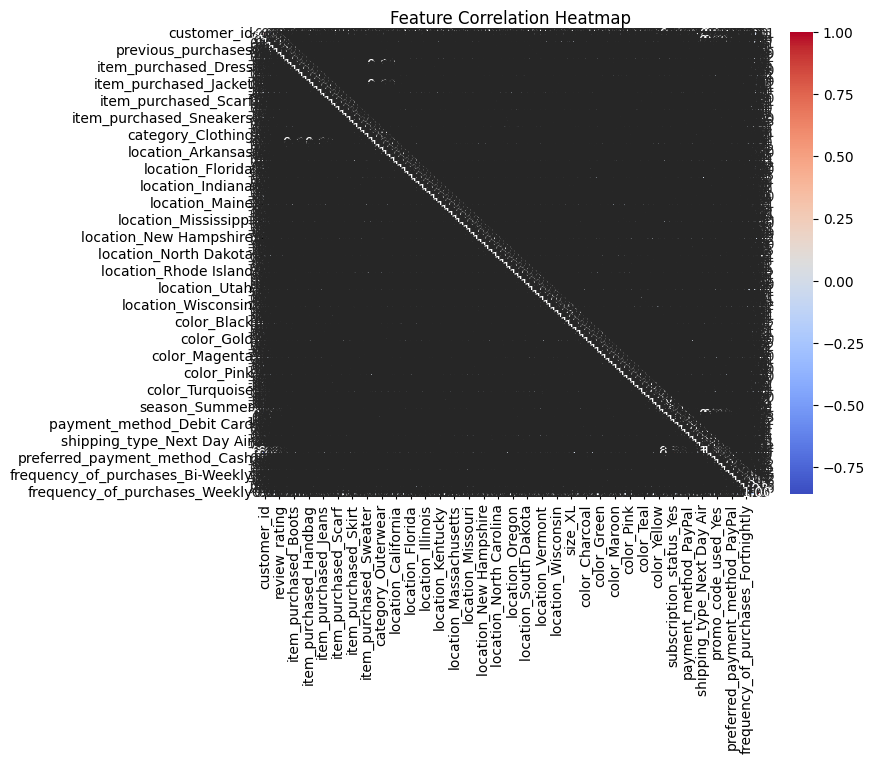

In [ ]:
shopping_encoded = shopping.copy()
shopping_encoded = pd.get_dummies(shopping_encoded, drop_first=True)

plt.figure(figsize=(8,6))
sns.heatmap(shopping_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


step 5

In [ ]:
shopping.columns = shopping.columns.str.strip()
print(shopping.columns)


Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'payment_method',
       'shipping_type', 'discount_applied', 'promo_code_used',
       'previous_purchases', 'preferred_payment_method',
       'frequency_of_purchases'],
      dtype='object')


<ipython-input-20-19c2d9a42050>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=shopping['previous_purchases'], y=shopping['purchase_amount_(usd)'], palette="muted")


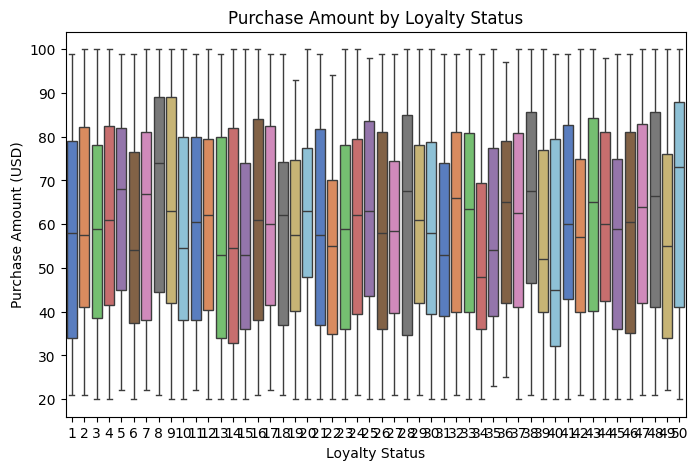

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=shopping['previous_purchases'], y=shopping['purchase_amount_(usd)'], palette="muted")
plt.title("Purchase Amount by Loyalty Status")
plt.xlabel("Loyalty Status")
plt.ylabel("Purchase Amount (USD)")
plt.show()

step 6

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df_ml = shopping[['age', 'previous_purchases', 'purchase_amount_(usd)']]
df_ml = pd.get_dummies(df_ml, drop_first=True)

X = df_ml.drop(columns=['purchase_amount_(usd)'])
y = df_ml['purchase_amount_(usd)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

Mean Absolute Error: 20.75
Mean Squared Error: 563.28
